# sklearn example

> Kaggle: Climate Change: Earth Surface Temperature Data

> https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

> **Classify Developed/Developing Countries**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [13]:
cf.offline = True
sns.set_style('whitegrid')

In [32]:
df = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

In [33]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


### impute data

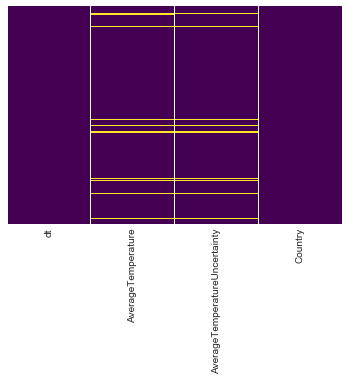

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
df.dt = pd.to_datetime(df.dt)

In [36]:
df['Month'] = df.dt.apply(lambda var: var.month)
df['Year'] = df.dt.apply(lambda var: var.year)

In [89]:
helpbymontdf = df.groupby(['Country','Year','Month']).AverageTemperature.mean().interpolate(limit = 1)

In [90]:
helpbyyeardf = df.groupby(['Country','Month','Year']).AverageTemperature.mean().interpolate(limit = 1)

In [93]:
helpbyaverage = df.groupby(['Country','Month']).AverageTemperature.mean()

In [97]:
helpbyaverage[helpbyaverage.isnull()]

Country     Month
Antarctica  1       NaN
            2       NaN
            3       NaN
            4       NaN
            5       NaN
            6       NaN
            7       NaN
            8       NaN
            9       NaN
            10      NaN
            11      NaN
            12      NaN
Name: AverageTemperature, dtype: float64

In [120]:
# drop Antarctica
df.drop(df[df.Country == "Antarctica"].index,inplace=True)
df[df.Country == "Antarctica"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Year


In [152]:
def impute_temp(cols):
    
    country, month, year, t = cols
    if pd.isnull(t):
        if pd.notnull(helpbymontdf.loc[country].loc[year].loc[month]):
            return helpbymontdf.loc[country].loc[year].loc[month]
        elif pd.notnull(helpbyyeardf.loc[country].loc[month].loc[year]):
            return helpbyyeardf.loc[country].loc[month].loc[year]
        else:
            return helpbyaverage.loc[country,month]
    else:
        return t

In [154]:
df.AverageTemperature = df[['Country','Month','Year','AverageTemperature']].apply(impute_temp,axis = 1)

In [158]:
df.drop("AverageTemperatureUncertainty",axis = 1,inplace=True)

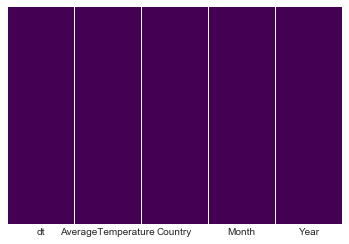

In [159]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [162]:
train = df.pivot_table(index = "Country", columns=["Year","Month"] , values = "AverageTemperature").dropna(axis = 1)

In [172]:
# get developing/developed from wiki
developing = [
'Albania'
,'Algeria'
,'Angola'
,'Antigua and Barbuda'
,'Azerbaijan'
,'Afghanistan'
,'Argentina'
,'Bahrain'
,'Bangladesh'
,'Barbados'
,'Belize'
,'Benin'
,'Bhutan'
,'Bolivia'
,'Bosnia and Herzegovina'
,'Botswana'
,'Brazil'
,'Brunei'
,'Bulgaria'
,'Burkina Faso'
,'Burundi'
,'Cambodia'
,'Cameroon'
,'Cape Verde'
,'Central African Republic'
,'Chad'
,'Ecuador'
,'Egypt'
,'El Salvador'
,'Equatorial Guinea'
,'Eritrea'
,'Ethiopia'
,'Fiji'
,'Philippines'
,'Gabon'
,'The Gambia'
,'Ghana'
,'Grenada'
,'Guatemala'
,'Guinea'
,'Guinea-Bissau'
,'Guyana'
,'Haiti'
,'Honduras'
,'India'
,'Indonesia'
,'Iran'
,'Iraq'
,'China'
,'Malaysia'
,'Mexico'
,'Nigeria'
,'Qatar']


developed = [
'Norway'
,'Australia'
,'Switzerland'
,'Denmark'
,'Netherland'
,'Germany'
,'Ireland'
,'Canada'
,'New Zealand'
,'Liechtenstein'
,'Sweden'
,'United Kingdom (Europe)'
,'United States'
,'Iceland'
,'Luxembourg'
,'Japan'
,'Belgium'
,'France'
,'Austria'
,'Finland'
,'Slovenia'
,'Spain'
,'Italy'
,'Poland'
,'Greece'
,'Chile'
,'Israel'
,'Turkey'
]

In [173]:
countrynotindata = set(developed+developing) - set(train.index)
developed = list(set(developed) - countrynotindata)
developing = list(set(developing) - countrynotindata)

In [175]:
train = train.loc[developed+developing]

In [178]:
train["dev"] = [ 1 if var in developed else 0 for var in train.index ]

In [183]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
init_notebook_mode(connected=True)

In [199]:
data = dict(type = 'choropleth', # type of geographical plot
            locations = train.index, # array/list 
            locationmode = 'country names', 
            colorscale= ['viridis'],
            text= train.index, # correspond to each location
            z=train.dev,# value represent the color
            ) # title for colorbar
layout = dict(
    title = 'Developed,Developing Countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

choromap = go.Figure(data = [data],layout = layout)
#plot(choromap) > open a html page
iplot(choromap)

In [201]:
train.head()

Year          1948                                                          \
Month            2       3       4       5       6       7       8       9   
Country                                                                      
Canada     -23.930 -18.523  -9.325   3.185   9.907  13.652  11.928   6.880   
Turkey       2.496   2.185   9.032  14.983  19.381  22.858  23.334  18.465   
Italy        5.205   9.588  11.806  16.163  18.443  19.709  21.833  18.681   
Luxembourg   1.979   7.930  10.057  13.826  15.851  16.695  16.854  14.142   
France       7.527  12.170  12.622  15.763  17.360  18.368  19.092  16.851   

Year                       ...    2013                                  \
Month           10      11 ...       1       2       3       4       5   
Country                    ...                                           
Canada      -0.592  -9.631 ... -21.633 -18.896 -14.001  -7.849   2.926   
Turkey      13.004   6.040 ...   2.103   4.820   7.630  12.102  17.522   
Italy       15.143   9.838 ...   5.585   4.485   8.144  12.642  15.446   
Luxembourg   9.342   5.213 ...   1.171   0.364   2.488   8.772  11.526   
France      13.418  10.368 ...   7.235   6.385   9.041  12.320  13.763   

Year                                        dev  
Month            6       7       8        9      
Country                                          
Canada      10.800  13.333  12.632   7.9220   1  
Turkey      20.862  23.335  23.839  11.1320   1  
Italy       19.764  23.651  23.603  24.2875   1  
Luxembourg  15.995  20.422  18.464  16.8520   1  
France      17.750  21.817  20.366  13.8815   1  

[5 rows x 789 columns]

## Standardize the Variables

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
scaler = StandardScaler()

In [204]:
scaler.fit(train.drop("dev",axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [205]:
scaled_features = scaler.transform(train.drop("dev",axis = 1))

In [208]:
df_feat = pd.DataFrame(scaled_features, columns = train.columns[:-1], index = train.index)

In [209]:
df_feat.head()

Year            1948                                                    \
Month             2         3         4         5         6         7    
Country                                                                  
Canada     -2.851056 -2.885545 -2.656654 -1.978990 -1.498131 -1.134062   
Turkey     -0.832876 -1.122708 -0.840514 -0.585533 -0.214424  0.173512   
Italy      -0.625987 -0.492503 -0.566070 -0.446163 -0.341521 -0.273756   
Luxembourg -0.872360 -0.633645 -0.739106 -0.722185 -0.692732 -0.701850   
France     -0.448653 -0.272701 -0.485339 -0.493407 -0.488266 -0.464225   

Year                                                  ...         2012  \
Month             8         9         10        11    ...           12   
Country                                               ...                
Canada     -1.382129 -1.780955 -1.990830 -2.243347    ...    -2.527801   
Turkey      0.233015 -0.253222 -0.527635 -0.830339    ...    -0.753873   
Italy       0.020467 -0.224737 -0.297437 -0.487884    ...    -0.601535   
Luxembourg -0.684584 -0.823303 -0.921738 -0.904907    ...    -0.751089   
France     -0.367672 -0.466063 -0.483081 -0.440096    ...    -0.366222   

Year            2013                                                    \
Month             1         2         3         4         5         6    
Country                                                                  
Canada     -2.665006 -2.500490 -2.345458 -2.477259 -2.013061 -1.514159   
Turkey     -0.852728 -0.707415 -0.638537 -0.571506 -0.325752 -0.144403   
Italy      -0.586872 -0.732743 -0.597977 -0.519924 -0.565739 -0.293875   
Luxembourg -0.923887 -1.044316 -1.044297 -0.889593 -1.018895 -0.806955   
France     -0.460892 -0.589092 -0.527194 -0.550682 -0.760296 -0.568045   

Year                                      
Month             7         8         9   
Country                                   
Canada     -1.391147 -1.435732 -1.725378  
Turkey      0.074054  0.203935 -1.245526  
Italy       0.120345  0.169406  0.721044  
Luxembourg -0.352674 -0.582467 -0.390463  
France     -0.148319 -0.304191 -0.834513  

[5 rows x 788 columns]

## Train/Fit

In [210]:
from sklearn.cross_validation import train_test_split

In [286]:
X = df_feat #train.drop("dev",axis = 1)
y = train.dev
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [287]:
from sklearn.neighbors import KNeighborsClassifier

In [288]:
knn = KNeighborsClassifier(n_neighbors=1)

In [289]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [290]:
pred = knn.predict(X_test)

## Evaluate

In [291]:
from sklearn.metrics import classification_report, confusion_matrix

In [292]:
print confusion_matrix(y_test,pred)
print classification_report(y_test,pred)

[[13  1]
 [ 4  9]]
             precision    recall  f1-score   support

          0       0.76      0.93      0.84        14
          1       0.90      0.69      0.78        13

avg / total       0.83      0.81      0.81        27



## Revisit

> choose a better k

In [293]:
error_rate = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
rst = pd.DataFrame(error_rate, index = range(1,21), columns=["K val"])

Text(0,0.5,u'Error Rate')

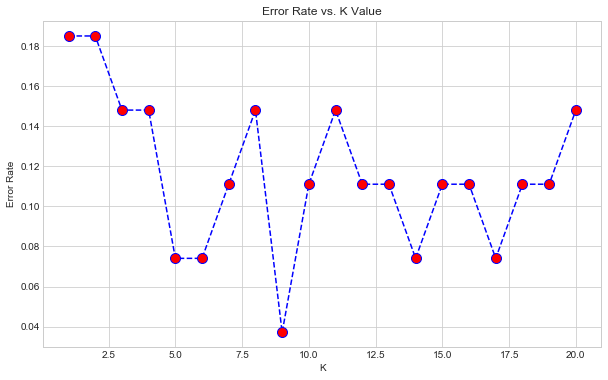

In [294]:
plt.figure(figsize=(10,6))
plt.plot(rst,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [296]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[14  0]
 [ 1 12]]


             precision    recall  f1-score   support

          0       0.93      1.00      0.97        14
          1       1.00      0.92      0.96        13

avg / total       0.97      0.96      0.96        27

